# Combates de pokémon utilizando random forest

---



Partiendo de una lista de pokémon con una serie de habilidades asociadas y una lista de combates entre dos pokémon y el resultado del combate, utilizaremos un algoritmo de machine learning de **random forest** con el objetivo de generar un modelo para predecir el ganador de un combate entre pokémon.

### Importar las librerías necesarias y lectura del conjunto de datos

*   En primer lugar, se importan las librerias necesarias de Python para el tratamiento de los datos, generación de gráficas y generación del modelo.

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

* En segundo lugar, se realiza la lectura de los ficheros en los que se encuentran el conjunto de datos con las habilidades de los pokémon y el conjunto de datos de los combates.

In [0]:
ds_pokemons = pd.read_csv('pokemons_data.csv')
ds_combats = pd.read_csv('pokemons_combats.csv')

* Después podemos visualizar nuestros DataFrame de Pandas que hemos obtenido de los ficheros .csv.

In [3]:
ds_pokemons

,#,Name,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,45,49,49,65,65,45,0
1,2,Ivysaur,60,62,63,80,80,60,0
2,3,Venusaur,80,82,83,100,100,80,0
3,4,Mega Venusaur,80,100,123,122,120,80,0
4,5,Charmander,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,1
796,797,Mega Diancie,50,160,110,160,110,110,1
797,798,Hoopa Confined,80,110,60,150,130,70,1
798,799,Hoopa Unbound,80,160,60,170,130,80,1


In [4]:
ds_combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


### Preprocesamiento del conjunto de datos

Visualización del tipo de dato que tienen las variables del conjunto de datos antes de realizar cualquier tratamiento de los mismos.

In [5]:
ds_pokemons.dtypes

#              int64
Name          object
Hit Points     int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Legendary      int64
dtype: object

In [6]:
ds_combats.dtypes

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object

Una vez tenemos los datos en el DataFrame de Pandas debemos validar si hay datos no disponibles.

In [7]:
ds_pokemons.isna().sum()

#             0
Name          1
Hit Points    0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Legendary     0
dtype: int64

In [8]:
ds_combats.isna().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

Antes de mostrar las correlaciones vamos a reindexar el dataset de las habilidades de los pokémon para que el índice empiece por 1 y en vez de 0.

Observamos un resumen estadístico de las variables del dataset de las habilidades de los pokémon. 

In [9]:
ds_pokemons = ds_pokemons.set_index('#')
ds_pokemons.describe()

,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,0.08125
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,0.27339
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,0.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,0.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,0.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,1.00000


Observamos las correlaciones existentes entre todas las variablesdel dataset de las habilidades de los pokémon.

In [10]:
display(ds_pokemons.corr())

,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Hit Points,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


Correlaciones en forma de tabla de mapa de calor:

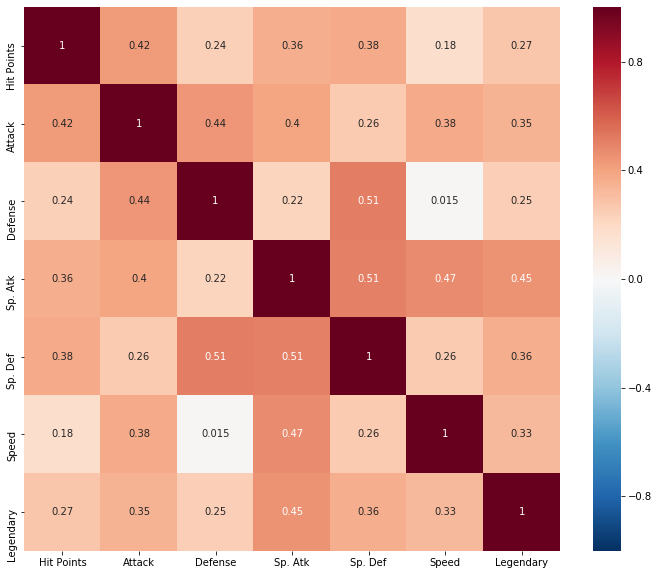

In [11]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(ds_pokemons.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

En el dataset de los combates entre pokemons tenemos la variable de salida que queremos predecir con el modelo. Como tenemos un combate entre dos pokémon y el ganador, vamos a transformar el valor de la variable de salida a 0 y 1 para identificar al ganador del combate en lugar del identificador del pokémon.

In [0]:
ds_combats.Winner[ds_combats.Winner == ds_combats.First_pokemon] = 0
ds_combats.Winner[ds_combats.Winner == ds_combats.Second_pokemon] = 1

In [13]:
ds_combats

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0
...,...,...,...
49995,707,126,0
49996,589,664,0
49997,303,368,1
49998,109,89,0


El último paso en el preprocesamiento de datos previo a la generación del modelo es realizar una normalización de las habilidades de los pokémon para que todas tengan el mismo rango, para ello definimos una función para realizar la normalización.

In [0]:
def normalizacion(data_df):
    stats = ["Hit Points","Attack","Defense","Sp. Atk","Sp. Def","Speed","Legendary"]
    stats_df = ds_pokemons[stats].T.to_dict("list")
    one=data_df.First_pokemon.map(stats_df)
    two=data_df.Second_pokemon.map(stats_df)
    temp_list = []
    for i in range(len(one)):
        temp_list.append(np.array(one[i])-np.array(two[i]))
    new_test = pd.DataFrame(temp_list, columns=stats)
    for c in stats:
        description=new_test[c].describe()
        new_test[c]=(new_test[c]-description['min'])/(description['max']-description['min'])
    return new_test

Se invoca a la función de normalización pasando cómo parámetro de la misma el dataset de combates y posteriormente se concatena el valor del ganador del combate. En el dataset resultante tendremos todos los combates con las habilidades de los pokémon del un combate normalizadas y el resultado del ganador.

In [15]:
data = normalizacion(ds_combats)
data = pd.concat([data,ds_combats.Winner], axis=1)
data

,Hit Points,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Winner
0,0.455556,0.468571,0.517241,0.450425,0.527578,0.450746,0.5,1
1,0.500000,0.374286,0.452874,0.543909,0.597122,0.507463,0.5,1
2,0.455556,0.385714,0.517241,0.365439,0.527578,0.507463,0.5,1
3,0.417778,0.257143,0.379310,0.521246,0.383693,0.423881,0.5,1
4,0.611111,0.628571,0.252874,0.790368,0.119904,0.656716,0.5,0
...,...,...,...,...,...,...,...,...
49995,0.655556,0.714286,0.563218,0.719547,0.731415,0.597015,1.0,0
49996,0.555556,0.571429,0.494253,0.450425,0.515588,0.531343,0.5,0
49997,0.471111,0.300000,0.586207,0.563739,0.527578,0.432836,0.5,1
49998,0.533333,0.471429,0.448276,0.379603,0.503597,0.671642,0.5,0


### Selección de variables para el modelo

Seleccionamos las variables de entrada del dataset normalizado, en este caso 'Hit Points' 'Attack'	'Defense'	'Sp. Atk'	'Sp. Def'	'Speed	Legendary' y la variable de salida 'Winner'.

In [16]:
x = data.drop(["Winner"], axis = 1)
y = data['Winner']
print("Número de observaciones del dataset:", y.shape[0])

Número de observaciones del dataset: 50000


### Entrenamiento y prueba del modelo

Antes de generar el modelo debemos dividir las observaciones del conjunto de datos en dos, una parte para entrenar el algoritmo (train) y otra para probarlo (test).

El porcentaje de datos entrenamiento del modelo será el 80% del dataset normalizado, siendo el 20% el porcentaje de pruebas del modelo.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
print("Número de observaciones para entrenamiento:", y_train.shape[0])
print("Número de observaciones para prueba       :", y_test.shape[0])

Número de observaciones para entrenamiento: 40000
Número de observaciones para prueba       : 10000


### Generación del modelo

Inicializamos el modelo llamando a una instancia de ***RandomForestClassifier()*** de la librería ***sklearn***.

Realizamos el entrenamiento del modelo.

In [18]:
modeloRFC = RandomForestClassifier(n_estimators=100)
modeloRFC.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicción de datos del modelo

Generamos la predición a partir de nuestro modelo ya entrenado.

In [19]:
y_pred = modeloRFC.predict(x_test)
print("Número de predicciones:", y_pred.shape[0])

Número de predicciones: 10000


### Precisión del modelo

Por último vamos a medir la **precisión** de nuestro modelo.

In [20]:
print('Precisión del modelo:', accuracy_score(y_test, y_pred))  

Precisión del modelo: 0.9519
